In [1]:
import obspy
import numpy as np
import math
import cmath
import serveobspy
from obspy import UTCDateTime, read, Trace, Stream
import dragrace
import SeismogramTasks as sTasks
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import json

In [2]:
# 2019-10-12T18:21:15Z Top fuel Q3 Heat 5 FALL
# FC Q4 Heat 6 2019-10-12T21:44:29Z

# TF Q4 Heat 3, 2019-10-12T21:10:03Z
# Heat 4, 2019-10-12T21:12:58Z
# Heat 5 2019-10-12T21:15:33Z

# 2019-04-27T18:53:36Z FC Q3 Heat 2 SP

In [ ]:
# SPRING
#/dragraceAnalysis-master/springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNX.mseed
#/dragraceAnalysis-master/springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNY.mseed
#/dragraceAnalysis-master/springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNZ.mseed
        
# FALL
#/dragraceAnalysis-master/fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNX.mseed
#/dragraceAnalysis-master/fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNY.mseed
#/dragraceAnalysis-master/fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNZ.mseed

In [6]:
# Spring
stxSP = obspy.read("./springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNX.mseed")
stySP = obspy.read("./springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNY.mseed")
stzSP = obspy.read("./springClean/Corrected/SPr_FL_2019-04-27T18:53:36Z_HNZ.mseed")
startTimeSP = stzSP[0].stats['starttime'] # start time (different than 'line')
zDeltaSP = stzSP[0].stats['delta'] #finds the time diff between each data point

print(startTimeSP,'spring')
                   
stxFA = obspy.read("./fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNX.mseed")
styFA = obspy.read("./fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNY.mseed")
stzFA = obspy.read("./fallClean/Corrected/FAr_NL_2019-10-12T18:21:15Z_HNZ.mseed")
startTimeFA = stzFA[0].stats['starttime'] # start time (different than 'line')
zDeltaFA = stzFA[0].stats['delta'] #finds the time diff between each data point

print(startTimeFA,'fall')

2019-04-27T18:53:26.001900Z spring
2019-10-12T18:21:05.002500Z fall


12000 len


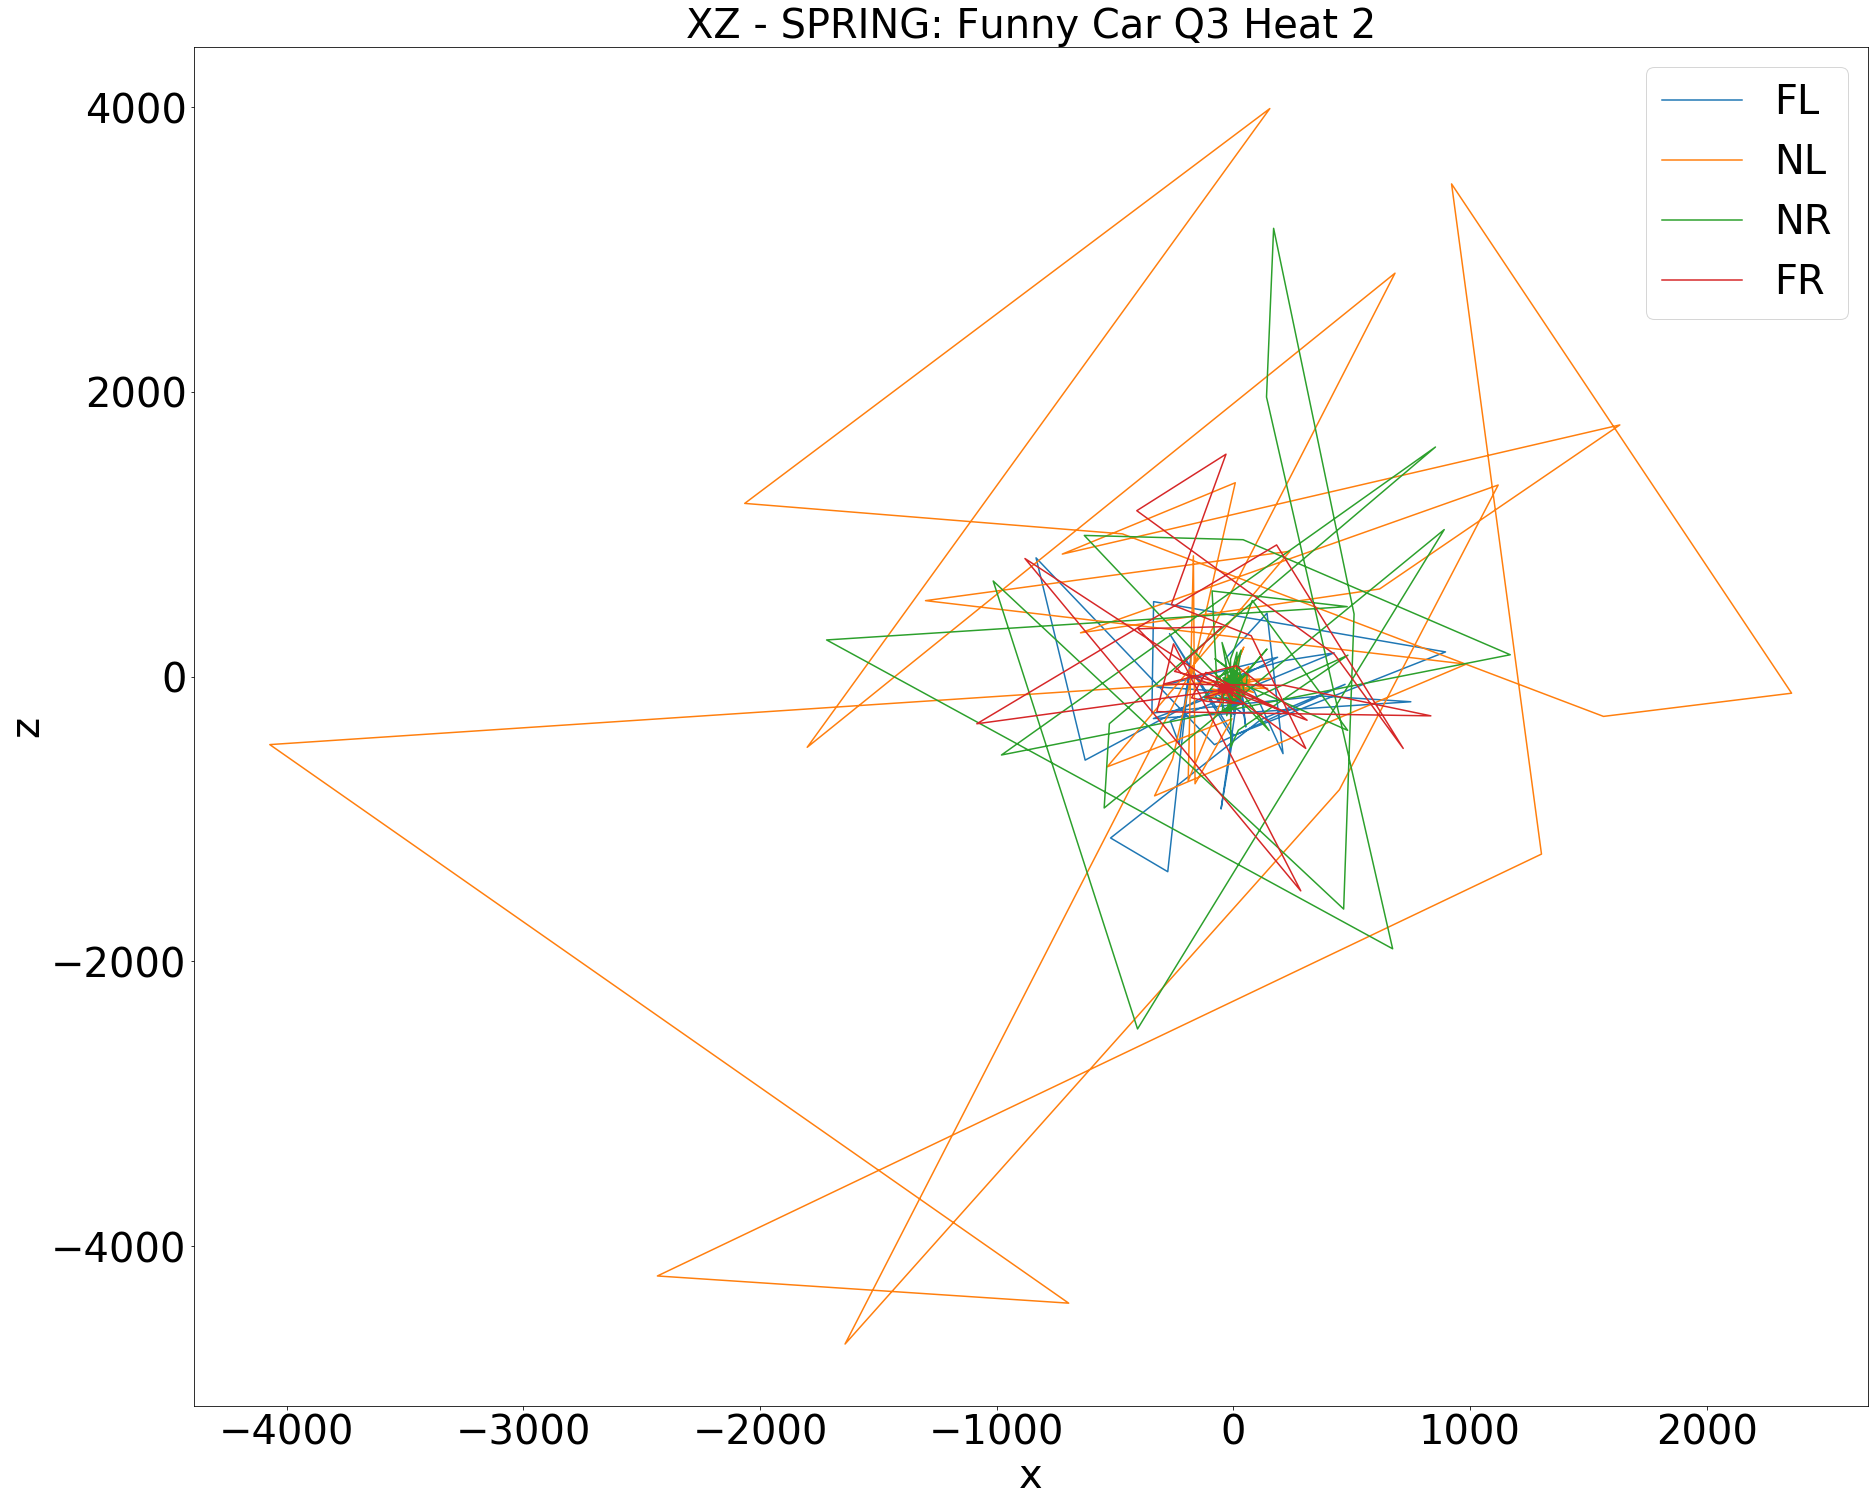

In [264]:
# XZ
fig = plt.figure(figsize=(30, 25))
ax = fig.add_subplot(111)
print(len(stxFA[0].data),'len')

for sta in ['FL', 'NL', 'NR', 'FR']:
    STX = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNX.mseed")
    STZ = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNZ.mseed")
    x = STX[0].data[5100:6600:15]
    z = STZ[0].data[5100:6600:15]
    if sta == 'FL':
        plt.plot(x,z)#,width = 0.002, color = 'r', label = 'FL')
    if sta == 'NL':
        plt.plot(x,z)#,width = 0.002, color = 'g', label = 'NL')
    if sta == 'NR':
        plt.plot(x,z)#,width = 0.002, color = 'b', label = 'NR')
    if sta == 'FR':
        plt.plot(x,z)#,width = 0.002, color = 'm', label = 'FR')

plt.xlabel('x', fontsize = 40)
plt.ylabel('z', fontsize = 40)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(['FL','NL','NR','FR'], fontsize = 40)
plt.title('XZ - SPRING: Funny Car Q3 Heat 2', fontsize = 40)
filename = 'SP_FC_Q3_heat2_vector'
plt.savefig('./springClean/Figures/sp_XZ' + filename + '.png', bbox_inches='tight')
plt.show()

#print(stxFA[0].data)

#print(stxFA[0].data[1::4])



12000 len


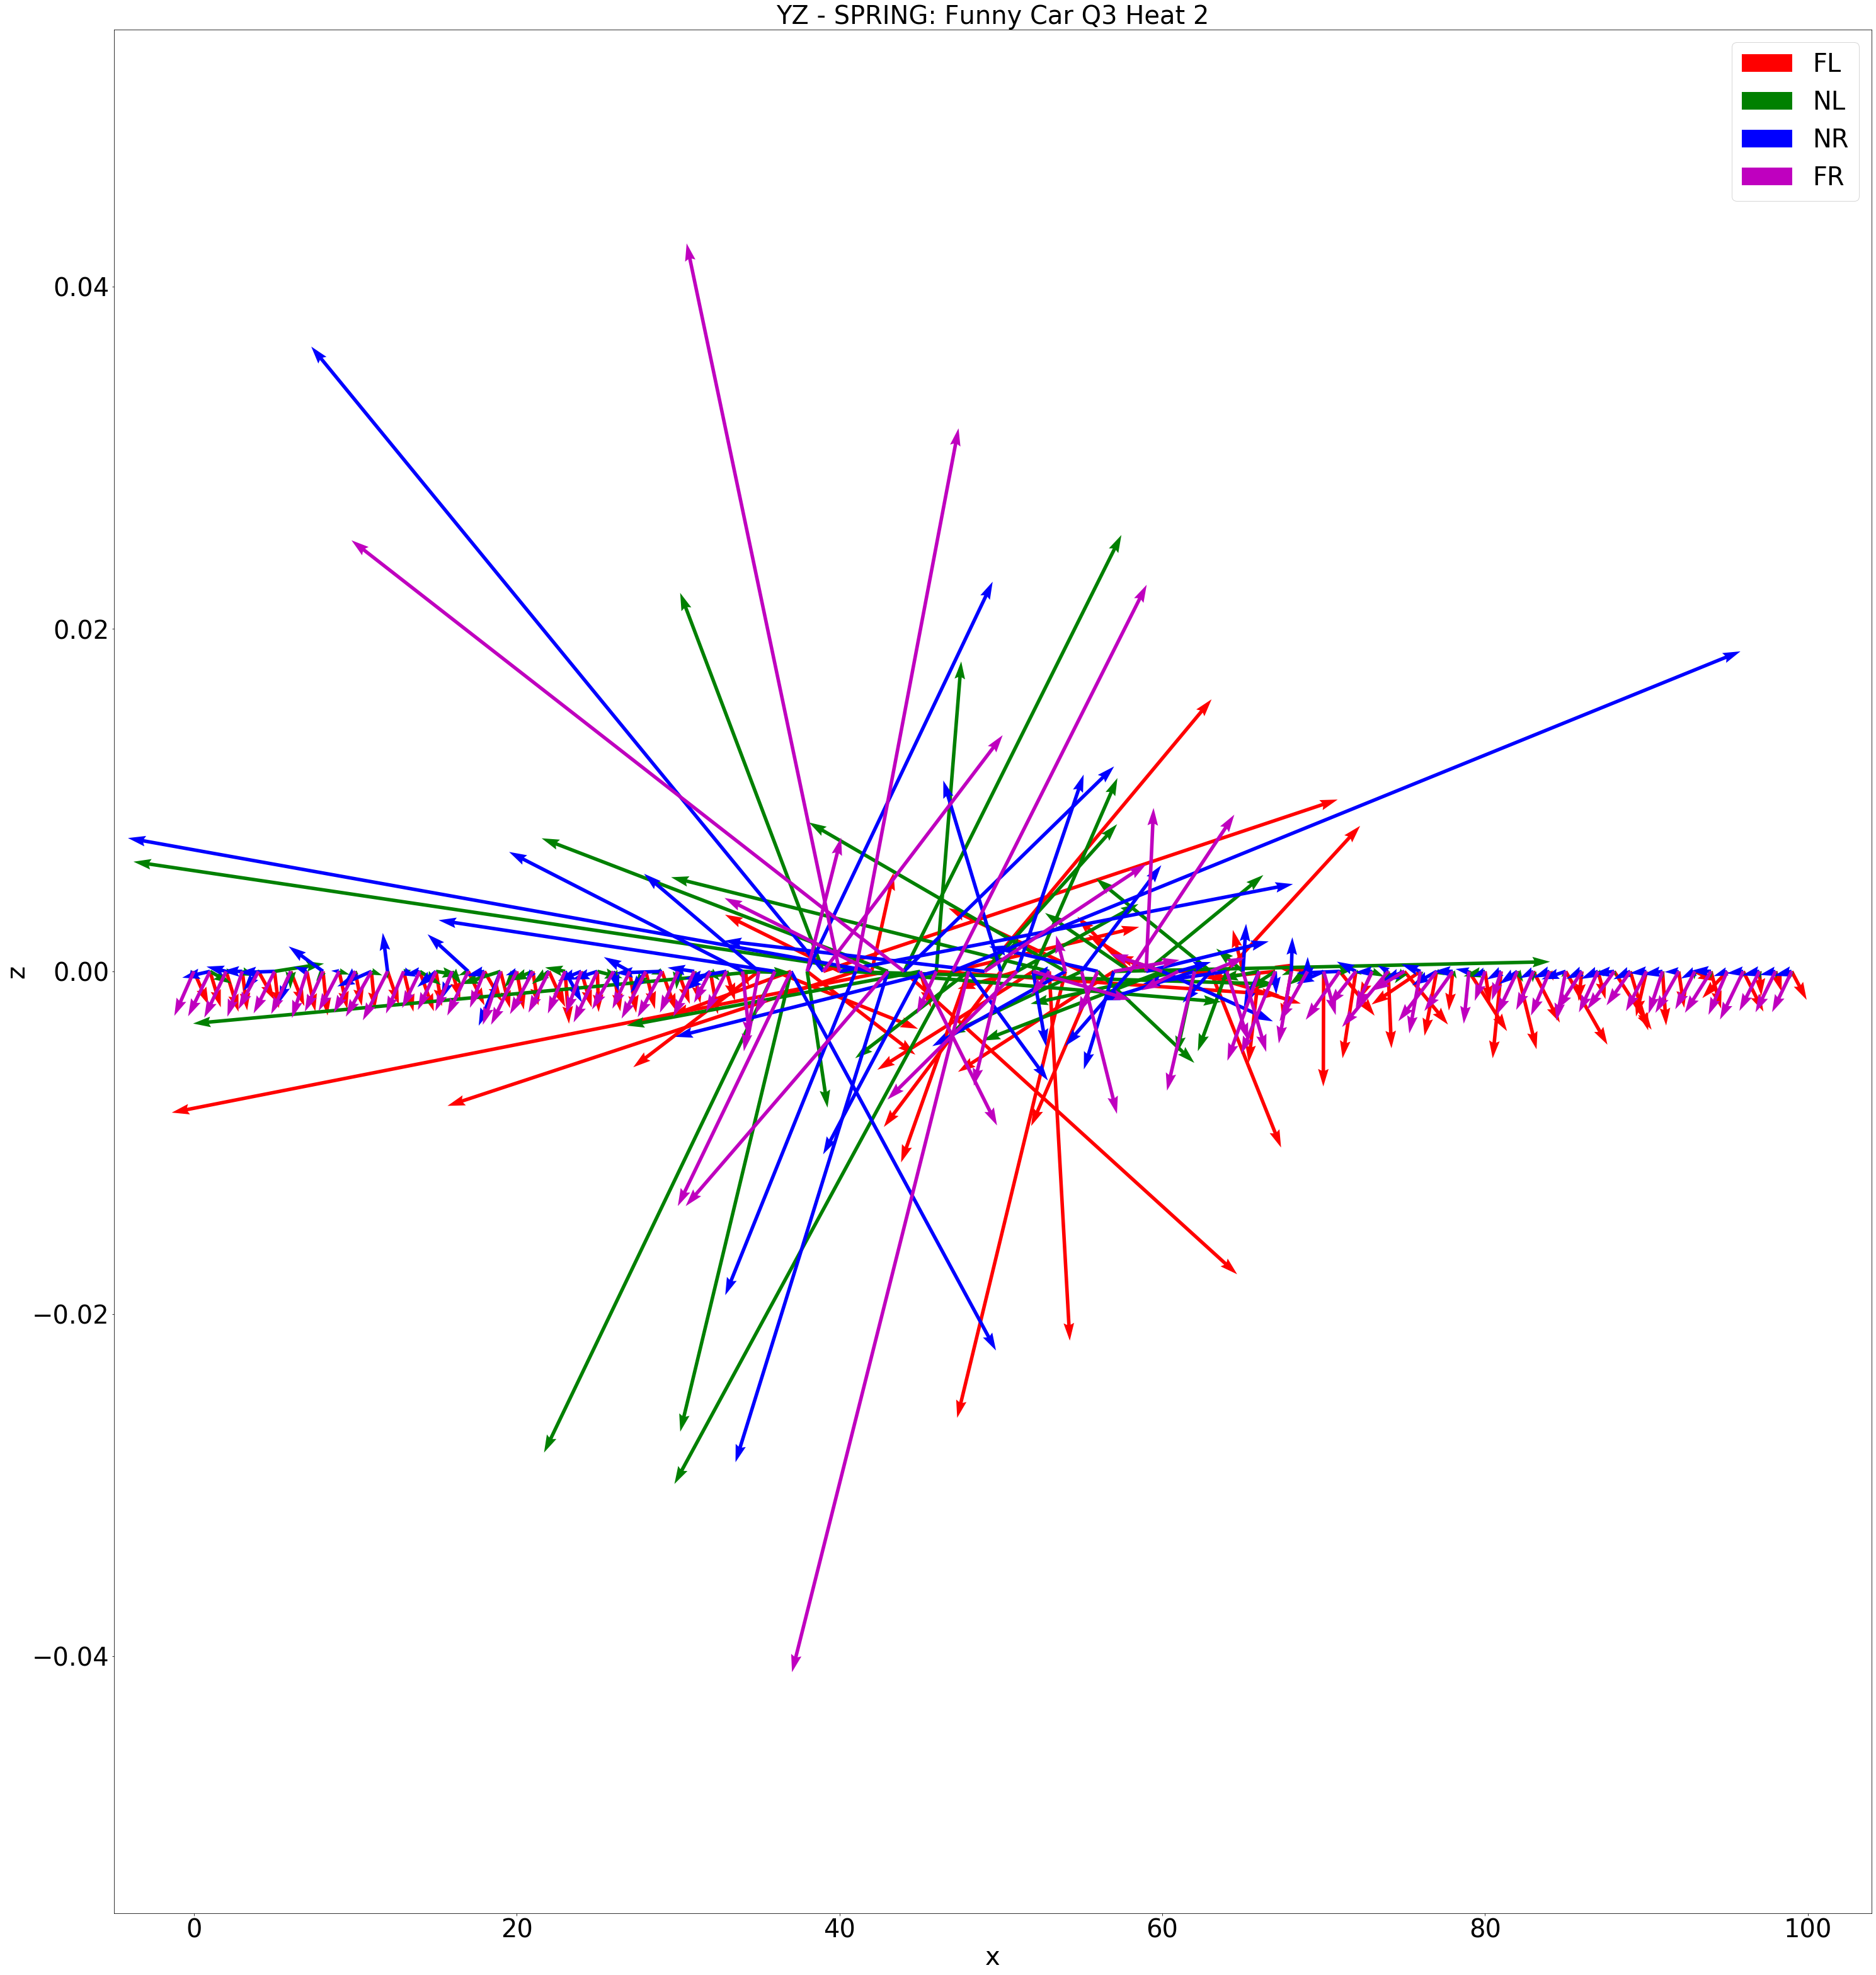

In [251]:
# YZ

fig = plt.figure(figsize=(50, 55))
ax = fig.add_subplot(111)
print(len(stxFA[0].data),'len')

for sta in ['FL', 'NL', 'NR', 'FR']:
    STY = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNY.mseed")
    STZ = obspy.read("./springClean/Corrected/SPr_" + sta + "_2019-04-27T18:53:36Z_HNZ.mseed")
    y = STY[0].data[5100:6600:15]
    z = STZ[0].data[5100:6600:15]
    if sta == 'FL':
        plt.quiver(y,z,width = 0.002, color = 'r', label = 'FL')
    if sta == 'NL':
        plt.quiver(y,z,width = 0.002, color = 'g', label = 'NL')
    if sta == 'NR':
        plt.quiver(y,z,width = 0.002, color = 'b', label = 'NR')
    if sta == 'FR':
        plt.quiver(y,z,width = 0.002, color = 'm', label = 'FR')

plt.xlabel('x', fontsize = 40)
plt.ylabel('z', fontsize = 40)
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.legend(['FL','NL','NR','FR'], fontsize = 40)
plt.title('YZ - SPRING: Funny Car Q3 Heat 2', fontsize = 40)
filename = 'SP_FC_Q3_heat2_vector'
plt.savefig('./springClean/Figures/sp_YZ' + filename + '.png', bbox_inches='tight')
plt.show()

12000 len


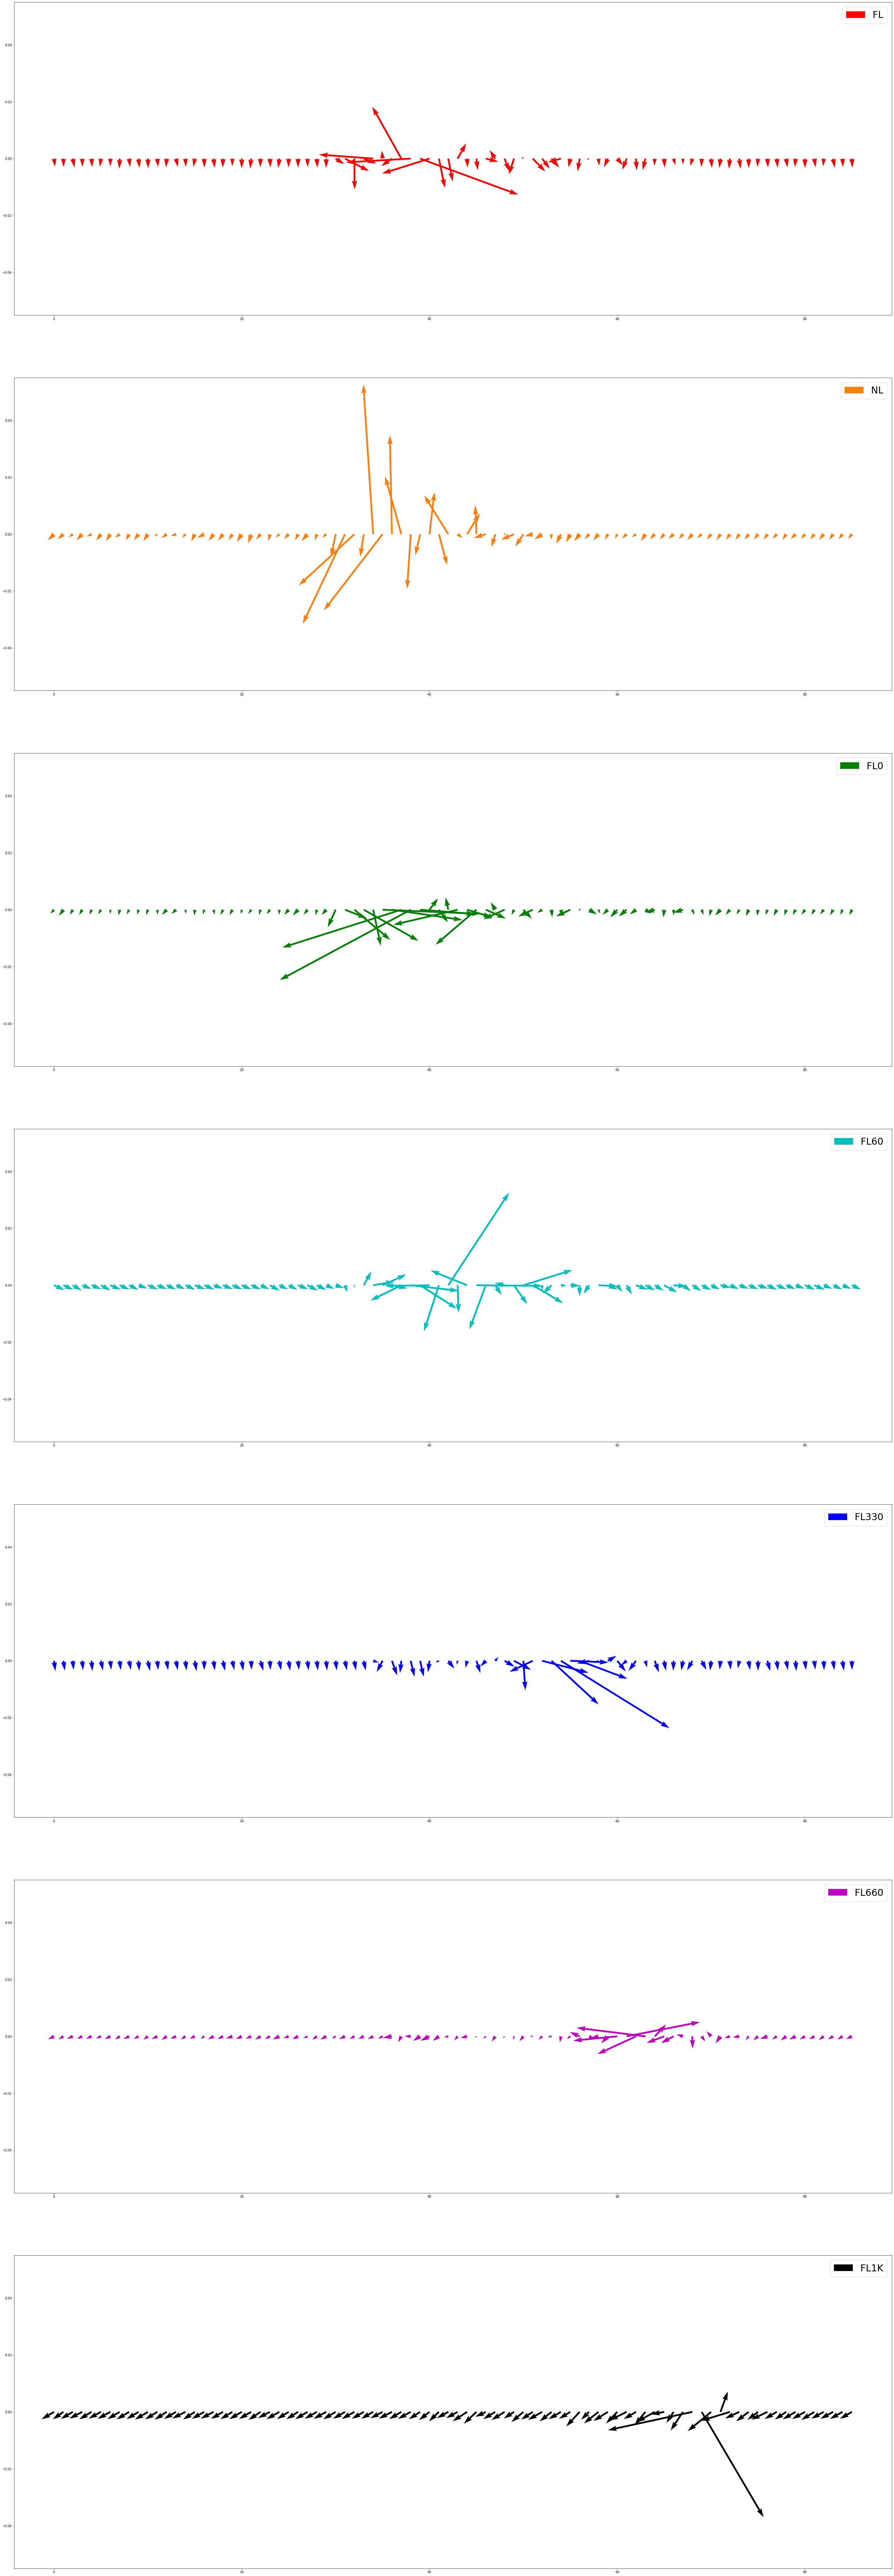

In [254]:
# XZ
print(len(stxFA[0].data),'len')

# FALL

# Top fuel Q3 Heat 5 
#filename = 'TF_Q3_h5_vector' # 2019-10-12T18:21:15Z

# TF Q4 Heat 3, 
#filename = 'TF_Q4_h3_vector' # 2019-10-12T21:10:03Z

# TF Q4 Heat 4, 
#filename = 'TF_Q4_h4_vector' # 2019-10-12T21:12:58Z

# TF Q4 Heat 5 
#filename = 'TF_Q4_h5_vector' # 2019-10-12T21:15:33Z

# FC Q4 Heat 6 
filename = 'FC_Q4_h6_vector' # 2019-10-12T21:44:29Z

#X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))

for sta in ['FL', 'NL', 'FL0','FL60','FL330','FL660','FL1K']:
    STX = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNX.mseed")
    STZ = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNZ.mseed")
    x = STX[0].data[5200:7000:21]
    z = STZ[0].data[5200:7000:21]
    if sta == 'FL':
        fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7) = plt.subplots(7,figsize=(50, 150))
        ax1.quiver(x,z,width = 0.002, color = 'r', label = 'FL', scale = 10000)
        ax1.legend(['FL'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'NL':
        ax2.quiver(x,z,width = 0.002, color = 'C1', label = 'NL', scale = 10000)
        ax2.legend(['NL'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL0':
        ax3.quiver(x,z,width = 0.002, color = 'g', label = 'FL0', scale = 10000)
        ax3.legend(['FL0'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL60':
        ax4.quiver(x,z,width = 0.002, color = 'c', label = 'FL60', scale = 10000)
        ax4.legend(['FL60'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL330':
        ax5.quiver(x,z,width = 0.002, color = 'b', label = 'FL330', scale = 10000)
        ax5.legend(['FL330'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL660':
        ax6.quiver(x,z,width = 0.002, color = 'm', label = 'FL660', scale = 10000)
        ax6.legend(['FL660'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL1K':
        ax7.quiver(x,z,width = 0.002, color = 'k', label = 'FL1K', scale = 10000)
        ax7.legend(['FL1K'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')




#plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
plt.show()

12000 len


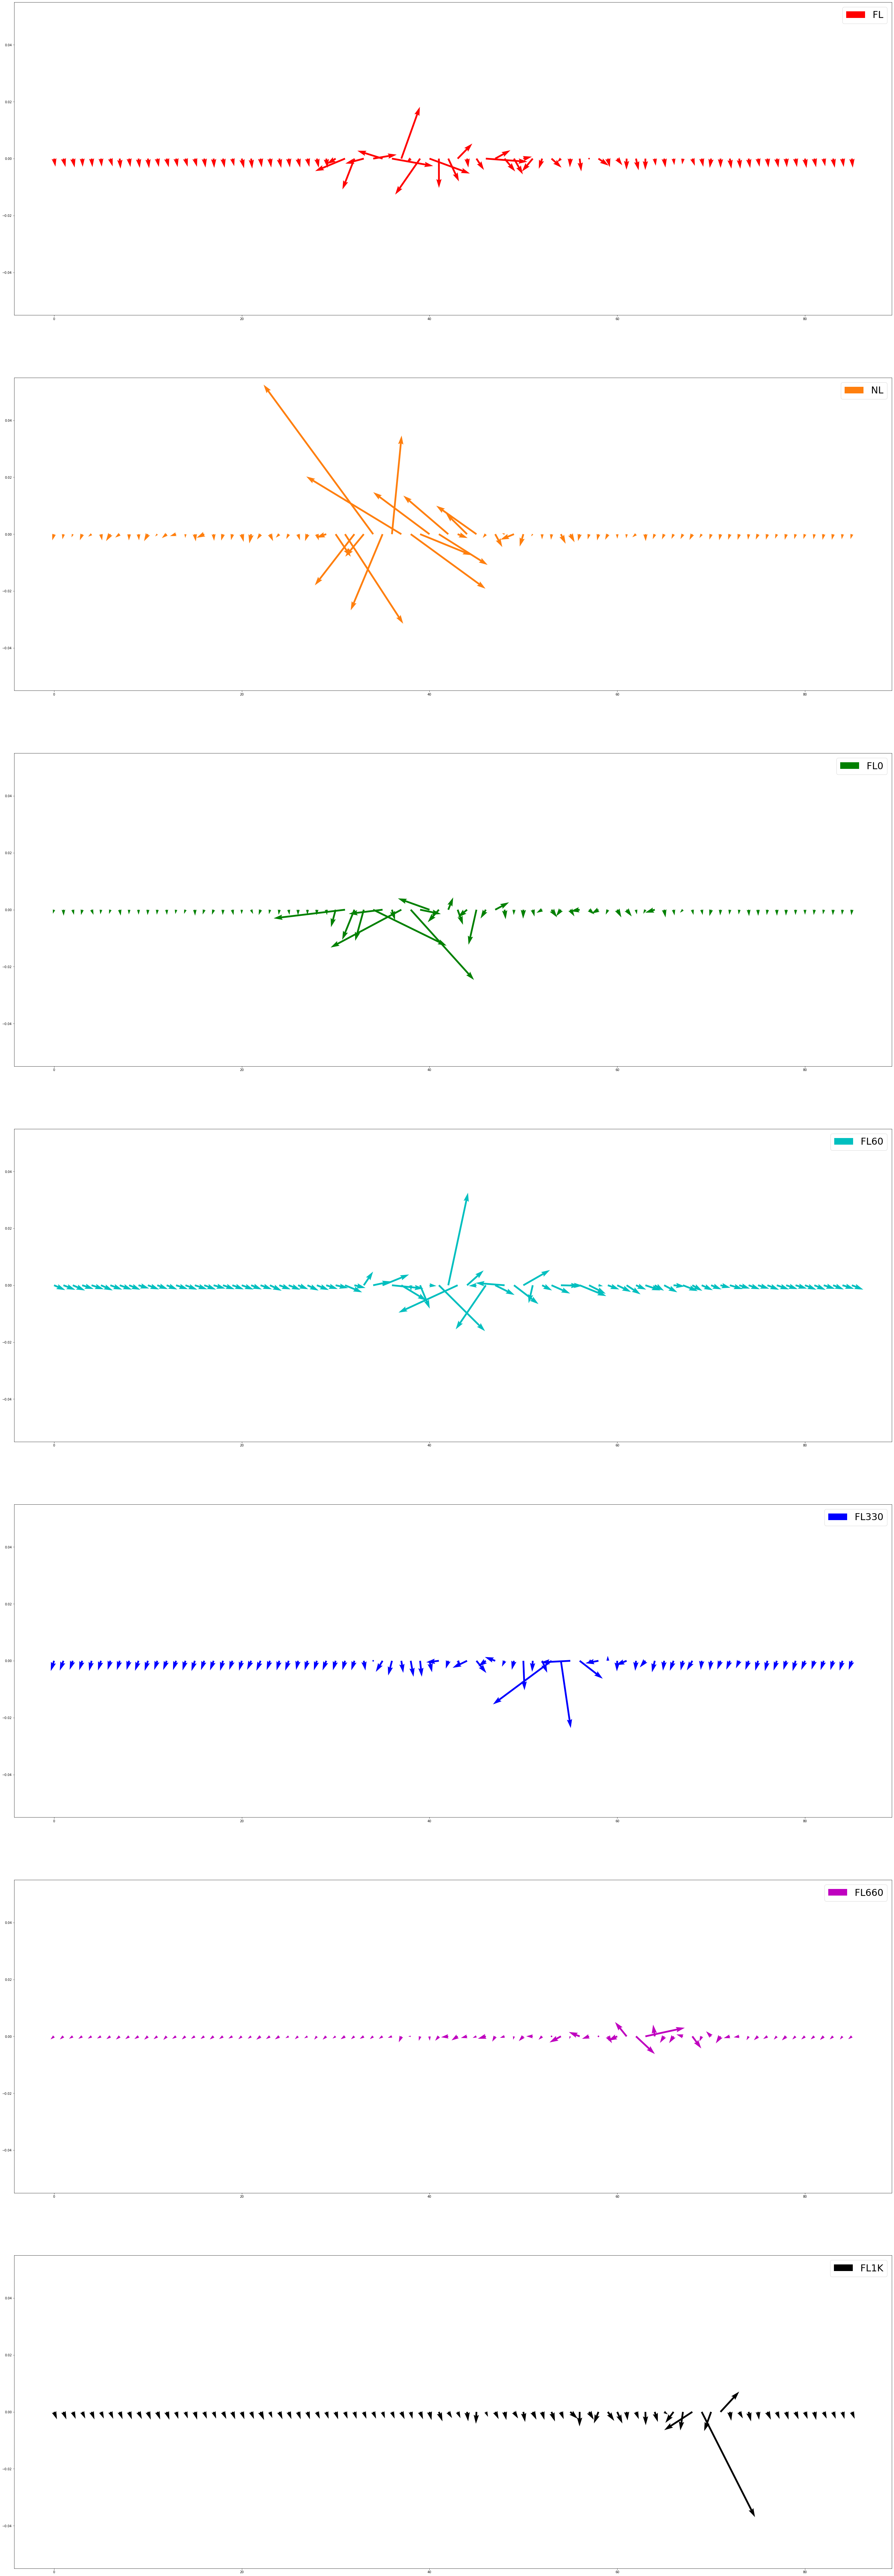

In [255]:
# YZ
print(len(stxFA[0].data),'len')

# FALL

# Top fuel Q3 Heat 5 
#filename = 'TF_Q3_h5_vector' # 2019-10-12T18:21:15Z

# TF Q4 Heat 3, 
#filename = 'TF_Q4_h3_vector' # 2019-10-12T21:10:03Z

# TF Q4 Heat 4, 
#filename = 'TF_Q4_h4_vector' # 2019-10-12T21:12:58Z

# TF Q4 Heat 5 
#filename = 'TF_Q4_h5_vector' # 2019-10-12T21:15:33Z

# FC Q4 Heat 6 
filename = 'FC_Q4_h6_vector' # 2019-10-12T21:44:29Z


for sta in ['FL', 'NL', 'FL0','FL60','FL330','FL660','FL1K']:
    STY = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNY.mseed")
    STZ = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNZ.mseed")
    y = STY[0].data[5200:7000:21]
    z = STZ[0].data[5200:7000:21]
    if sta == 'FL':
        fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7) = plt.subplots(7,figsize=(50, 150))
        ax1.quiver(y,z,width = 0.002, color = 'r', label = 'FL', scale = 10000)
        ax1.legend(['FL'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'NL':
        ax2.quiver(y,z,width = 0.002, color = 'C1', label = 'NL', scale = 10000)
        ax2.legend(['NL'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL0':
        ax3.quiver(y,z,width = 0.002, color = 'g', label = 'FL0', scale = 10000)
        ax3.legend(['FL0'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL60':
        ax4.quiver(y,z,width = 0.002, color = 'c', label = 'FL60', scale = 10000)
        ax4.legend(['FL60'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL330':
        ax5.quiver(y,z,width = 0.002, color = 'b', label = 'FL330', scale = 10000)
        ax5.legend(['FL330'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL660':
        ax6.quiver(y,z,width = 0.002, color = 'm', label = 'FL660', scale = 10000)
        ax6.legend(['FL660'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
    if sta == 'FL1K':
        ax7.quiver(y,z,width = 0.002, color = 'k', label = 'FL1K', scale = 10000)
        ax7.legend(['FL1K'], fontsize = 30)
        #plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')




#plt.savefig('./fallClean/Figures/fa_' + filename + '_' + sta + '.png', bbox_inches='tight')
plt.show()

In [261]:
#following an example

#time = nc.variables['wind_time'][:]
#u = nc.variables['Uwind'][:,0,0]
#v = nc.variables['Vwind'][:,0,0]
#uv = np.sqrt(u**2 + v**2)

#plt.figure(figsize=(10,2))
#plt.quiver((time-61), 0, u, v, uv)
#plt.xlim(22, 24)
#plt.ylim(-10, 10)

from datetime import datetime, timedelta

for sta in ['FL', 'NL', 'FL0','FL60','FL330','FL660','FL1K']:  
    
    STY = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNY.mseed")
    STZ = obspy.read("./fallClean/Corrected/FAr_" + sta + "_2019-10-12T21:44:29Z_HNZ.mseed")
    
    timeSTX = STY[0].stats['starttime']
    timeSTX = datetime.datetime(timeSTX)
    print(timeSTX)
    #startTime = stz[0].stats['starttime'] # start time (different than 'line')
    #zDelta = stz[0].stats['delta'] #finds the time diff between each data point
    #timeArray = startTime+timedelta(seconds=timeDelta)                
    
    #timeSTX = datetime
    
   

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'